In [638]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

# EDA

In [639]:
df = pd.read_csv('CarPricesPrediction.csv')

In [640]:
df.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [641]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [642]:
df.columns

Index(['Make', 'Model', 'Year', 'Mileage', 'Condition', 'Price'], dtype='object')

In [643]:
df.shape

(1000, 6)

In [644]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [645]:
df['Make'].unique()

array(['Ford', 'Toyota', 'Chevrolet', 'Nissan', 'Honda'], dtype=object)

In [646]:
df['Model'].unique()

array(['Silverado', 'Civic', 'Altima', 'Camry', 'F-150'], dtype=object)

In [647]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair'], dtype=object)

In [648]:
df.describe()

,Year,Mileage,Price
count,1000.00000,1000.000000,1000.000000
mean,2015.86500,78796.927000,22195.205650
std,3.78247,39842.259941,4245.191585
min,2010.00000,10079.000000,12613.000000
25%,2013.00000,44942.750000,18961.862500
50%,2016.00000,78056.500000,22247.875000
75%,2019.00000,112366.250000,25510.275000
max,2022.00000,149794.000000,31414.900000


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

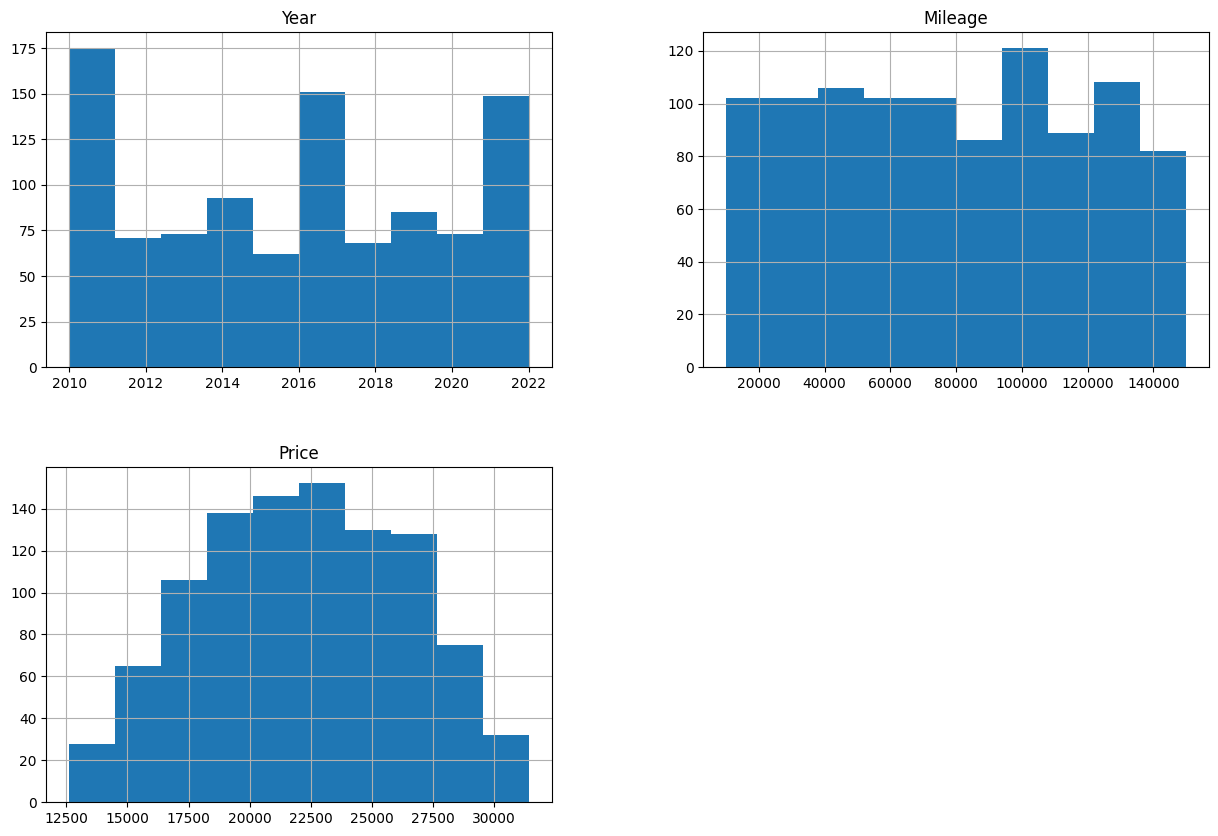

In [649]:
plt.rcParams["figure.figsize"] = (15, 10)
df.hist()

In [650]:
condition = df['Condition'].value_counts().reset_index()

Построим гистограммы.

<Axes: xlabel='Condition', ylabel='count'>

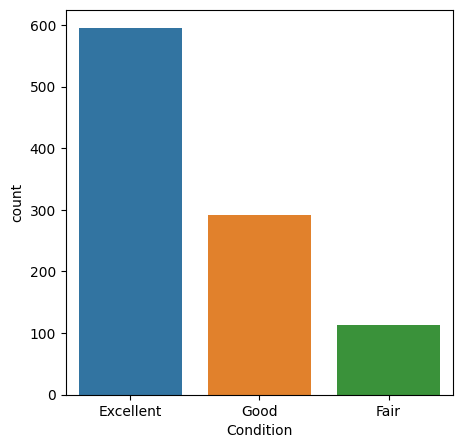

In [651]:
plt.rcParams["figure.figsize"] = (5, 5)
sns.barplot(condition, x='Condition', y='count', hue='Condition')

In [652]:
cars = df['Make'].value_counts()
cars

Make
Chevrolet    209
Toyota       205
Ford         199
Honda        199
Nissan       188
Name: count, dtype: int64

Посмотрим на цены по годам

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021'),
  Text(12, 0, '2022')])

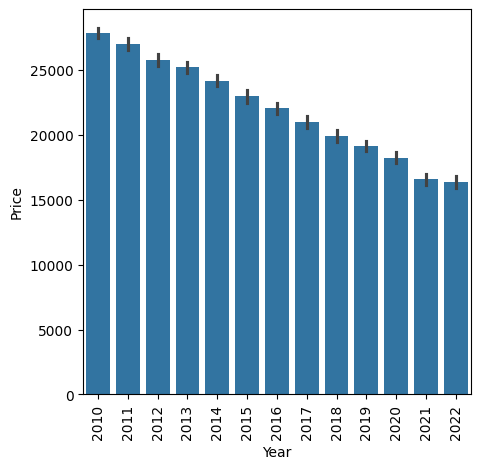

In [653]:
plt.rcParams["figure.figsize"] = (5, 5)
sns.barplot(data=df, x='Year', y='Price')
plt.xticks(rotation=90)

Разберемся, почему с каждым годом цена становится ниже?

Посмотрим максимальные и минимальные значения цен.

In [654]:
df.loc[[df['Price'].idxmax()]]

,Make,Model,Year,Mileage,Condition,Price
998,Toyota,Silverado,2010,11704,Good,31414.9


In [655]:
df.loc[[df['Price'].idxmin()]]

,Make,Model,Year,Mileage,Condition,Price
486,Ford,F-150,2022,147742,Excellent,12613.0


Можно заметить, что дело в Mileage (пробеге), чем ниже пробег, чем выше цена.

Посмотрим на одном примере тенденцию Price к Mileage.

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000'),
  Text(140000.0, 0, '140000'),
  Text(160000.0, 0, '160000')])

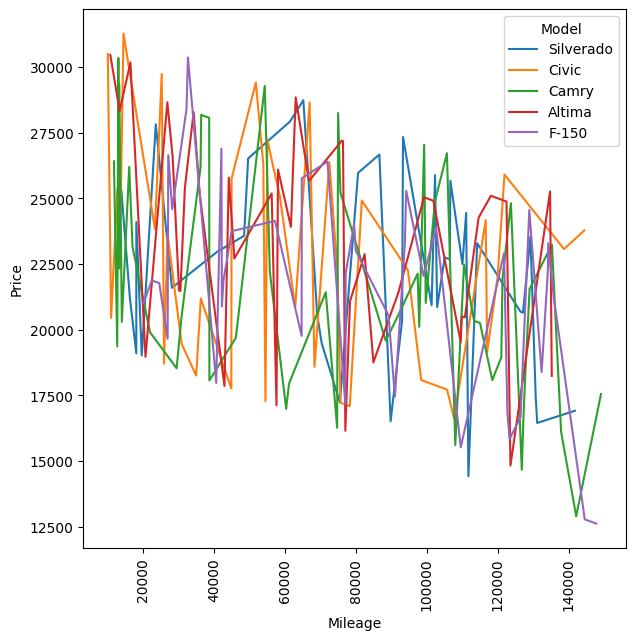

In [656]:
data_ex = df.loc[df['Make'] == 'Ford']
plt.rcParams["figure.figsize"] = (7, 7)
sns.lineplot(data=data_ex, x='Mileage', y='Price', hue='Model')
plt.xticks(rotation=90)

Получился не очень красивый график, но вывод в том, что, чем выше Mileage, тем Price ниже.

Посторим heatmap, чтобы узнать какие признаки сильно скоррелированы.

<Axes: >

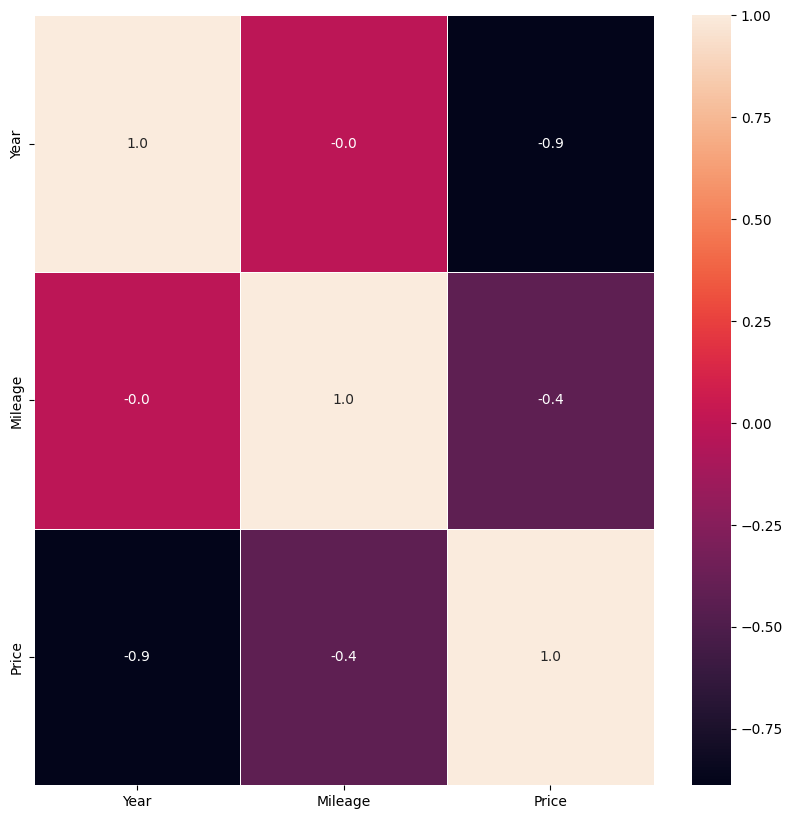

In [657]:
plt.rcParams["figure.figsize"] = (10, 10)
X = df.drop(['Make', 'Model', 'Condition'], axis=1)
sns.heatmap(X.corr(method='spearman'), annot=True, linewidths=.5, fmt='.1f')

Можно заметить, что Mileage, имеет более сильную корреляцию с Price, чем Year.

Интересно, а что косается категорильных признаков?

In [658]:
df['make-model'] = df['Make'] + "-" + df['Model']
df = df.drop(['Make', 'Model'], axis=1)
df.head()

,Year,Mileage,Condition,Price,make-model
0,2022,18107,Excellent,19094.75,Ford-Silverado
1,2014,13578,Excellent,27321.10,Toyota-Silverado
2,2016,46054,Good,23697.30,Chevrolet-Civic
3,2022,34981,Excellent,18251.05,Ford-Civic
4,2019,63565,Excellent,19821.85,Chevrolet-Civic


In [659]:

new_df = df.copy()

Make и Model я сцепил вместе, так как есть не уникальные значенияЮ, то есть, есть схожие наименование значения Model у разных Make,
таким образом, я хочу получить большую уникальность значений.

Далее применяю OneHotEncoder()

In [660]:
onehotencoder = OneHotEncoder()

cols = ['Condition', 'make-model']
for c in cols:
    onehot_columns = onehotencoder.fit_transform(new_df[[c]].values)

    new_c = pd.DataFrame(onehot_columns.toarray(), 
                columns=onehotencoder.get_feature_names_out([c]))
    
    new_df = new_df.drop([c], axis=1)
    new_df = pd.concat([new_df, new_c], axis=1)

In [661]:
new_df.head()

,Year,Mileage,Price,Condition_Excellent,Condition_Fair,Condition_Good,make-model_Chevrolet-Altima,make-model_Chevrolet-Camry,make-model_Chevrolet-Civic,make-model_Chevrolet-F-150,...,make-model_Nissan-Altima,make-model_Nissan-Camry,make-model_Nissan-Civic,make-model_Nissan-F-150,make-model_Nissan-Silverado,make-model_Toyota-Altima,make-model_Toyota-Camry,make-model_Toyota-Civic,make-model_Toyota-F-150,make-model_Toyota-Silverado
0,2022,18107,19094.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,13578,27321.10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2016,46054,23697.30,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022,34981,18251.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,63565,19821.85,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Чтобы снизить "вес" Year, от текущего года отнимаю настоящий год

In [662]:
current_year = 2024
new_df['current_year'] = current_year
new_df.insert(0, 'year', new_df['current_year'] - new_df['Year'])
new_df = new_df.drop(['current_year', 'Year'], axis=1)

In [663]:
new_df.insert(0, 'price', pd.Series(new_df['Price']))
new_df = new_df.drop(['Price'], axis=1)

In [664]:
new_df.head()

,price,year,Mileage,Condition_Excellent,Condition_Fair,Condition_Good,make-model_Chevrolet-Altima,make-model_Chevrolet-Camry,make-model_Chevrolet-Civic,make-model_Chevrolet-F-150,...,make-model_Nissan-Altima,make-model_Nissan-Camry,make-model_Nissan-Civic,make-model_Nissan-F-150,make-model_Nissan-Silverado,make-model_Toyota-Altima,make-model_Toyota-Camry,make-model_Toyota-Civic,make-model_Toyota-F-150,make-model_Toyota-Silverado
0,19094.75,2,18107,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27321.10,10,13578,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,23697.30,8,46054,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18251.05,2,34981,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19821.85,5,63565,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Снова посмотрим heatmap

<Axes: >

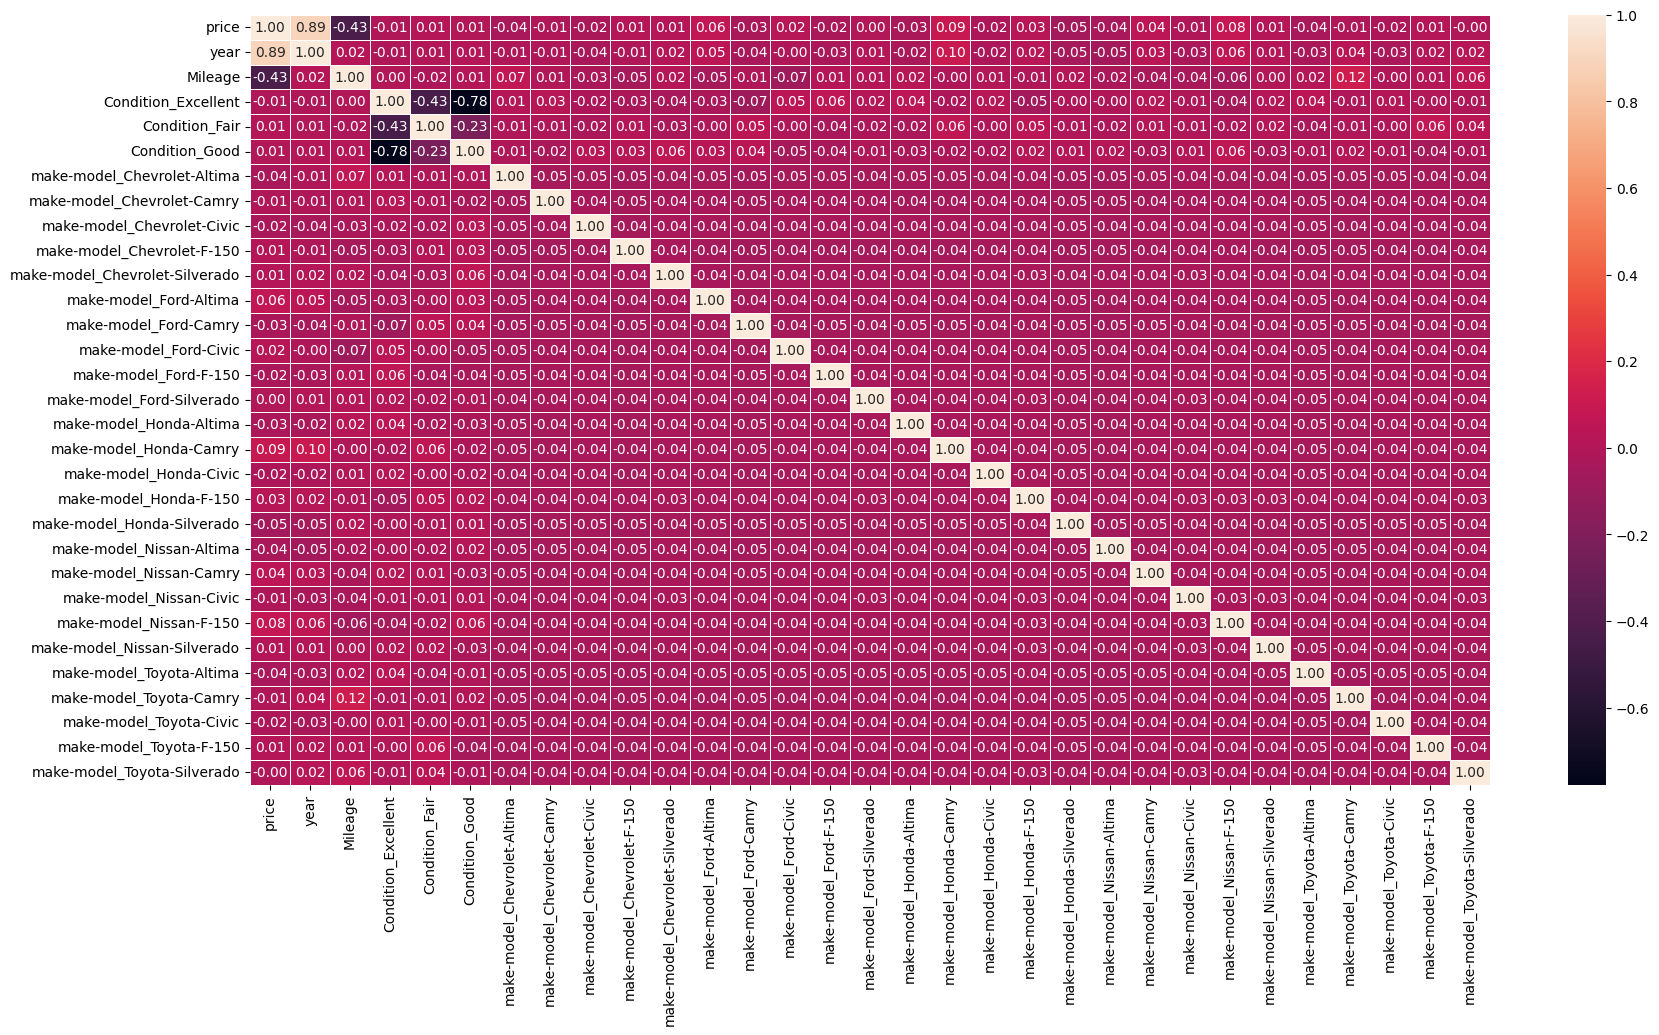

In [665]:
plt.rcParams["figure.figsize"] = (20, 10)
sns.heatmap(new_df.corr(method='spearman'), annot=True, linewidths=.5, fmt='.2f')

Год стал более значимым!

In [666]:
# new_df = new_df.drop(new_df.iloc[:, 3:], axis=1)

# ML

Посмотрим, какие фичи являются наиболее значимыми.

Возьмем 3 модели: LinearRegression(), KNeighborsRegressor(), RandomForestRegressor()

In [667]:
new_df.columns

Index(['price', 'year', 'Mileage', 'Condition_Excellent', 'Condition_Fair',
       'Condition_Good', 'make-model_Chevrolet-Altima',
       'make-model_Chevrolet-Camry', 'make-model_Chevrolet-Civic',
       'make-model_Chevrolet-F-150', 'make-model_Chevrolet-Silverado',
       'make-model_Ford-Altima', 'make-model_Ford-Camry',
       'make-model_Ford-Civic', 'make-model_Ford-F-150',
       'make-model_Ford-Silverado', 'make-model_Honda-Altima',
       'make-model_Honda-Camry', 'make-model_Honda-Civic',
       'make-model_Honda-F-150', 'make-model_Honda-Silverado',
       'make-model_Nissan-Altima', 'make-model_Nissan-Camry',
       'make-model_Nissan-Civic', 'make-model_Nissan-F-150',
       'make-model_Nissan-Silverado', 'make-model_Toyota-Altima',
       'make-model_Toyota-Camry', 'make-model_Toyota-Civic',
       'make-model_Toyota-F-150', 'make-model_Toyota-Silverado'],
      dtype='object')

Разделим на целевуюи на остальные признаки

In [668]:
X = new_df.iloc[:, 1:]
y = new_df.iloc[:, 0]

In [669]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [670]:
model_LinearRegression = LinearRegression()
model_KNeighborsRegressor = KNeighborsRegressor()
model_RandomForestRegressor = RandomForestRegressor()


model_LinearRegression.fit(X, y)
model_KNeighborsRegressor.fit(X, y)
model_RandomForestRegressor.fit(X, y)

RandomForestRegressor()

RandomForestRegressor показывает более выраженную значимость двух фич.

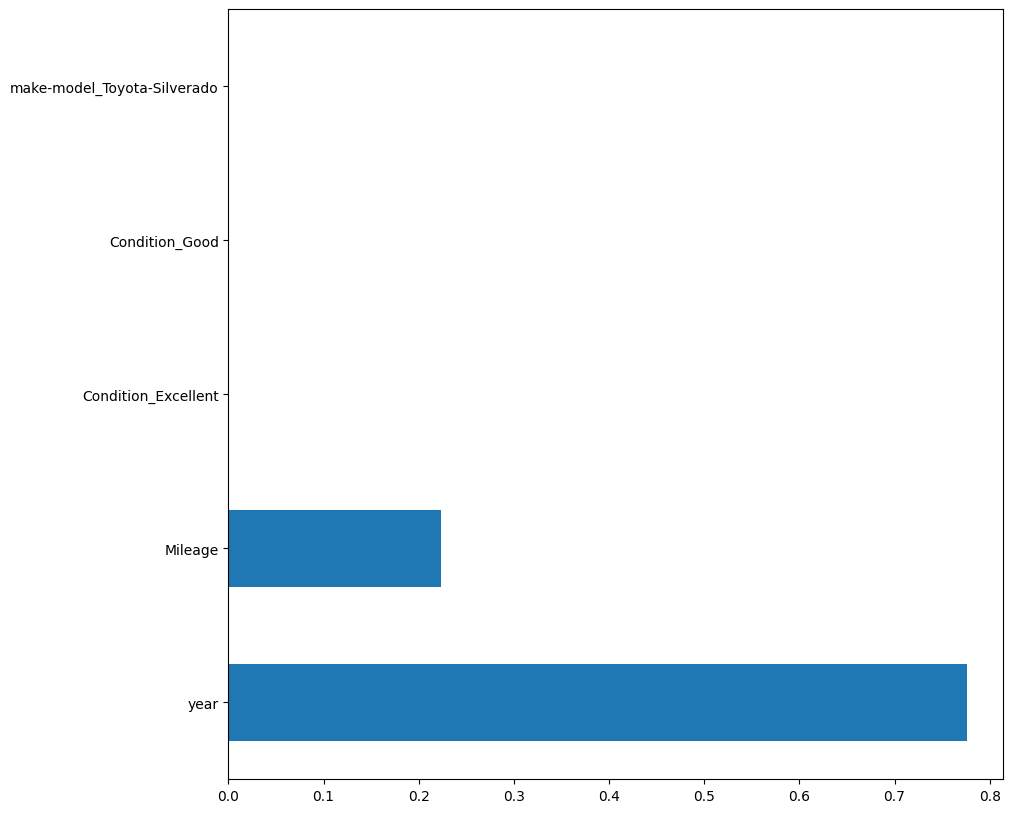

In [671]:
plt.rcParams['figure.figsize'] = (10, 10)
fi = pd.Series(model_RandomForestRegressor.feature_importances_, index=X.columns)
fi.nlargest(5).plot(kind='barh')
plt.show()

Приступим к обучению моделей, чтобы спрогнозировать цены на автомобили.

Разделим данные на обучающие и тестовые

In [672]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [673]:
model_LinearRegression = LinearRegression()
model_KNeighborsRegressor = KNeighborsRegressor()
model_RandomForestRegressor = RandomForestRegressor()

model_LinearRegression.fit(X_train, y_train)
model_KNeighborsRegressor.fit(X_train, y_train)
model_RandomForestRegressor.fit(X_train, y_train)

RandomForestRegressor()

Проведем первичную кросс-валидацию.

In [674]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_LinearRegression, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(-scores.mean())

0.004454552726902128


In [675]:
scores = cross_val_score(model_KNeighborsRegressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(-scores.mean())

18005236.938033003


In [676]:
scores = cross_val_score(model_RandomForestRegressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(-scores.mean())

39156.98310362754


Подберем гиперпараментры

In [677]:
from sklearn.model_selection import RandomizedSearchCV

param_dist_ln = {
    'fit_intercept': [True, False]
}

param_dist_knn = {
    'n_neighbors': [i for i in range(1, 500, 100)],
    'p': [1, 2, 3, 4],
    'weights': ['uniform', 'distance']

}

param_dist_rf = {
    'n_estimators': [i for i in range(100, 1300, 100)],
    'max_depth': [i for i in range(5, 35, 5)],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 15, 100]
}

In [678]:
model_LinearRegression = LinearRegression()

model_LinearRegression = RandomizedSearchCV(
    estimator=model_LinearRegression,
    param_distributions=param_dist_ln,
    cv=5,
    scoring='r2',
    n_iter=10,
    verbose=1,
    random_state=0
)

model_LinearRegression.fit(X_train, y_train)

print('best cv: {:.3f}'.format(model_LinearRegression.best_score_))
print('best cv fit_intercept:', model_LinearRegression.best_estimator_.fit_intercept)
print("Best Hyperparameters:", model_LinearRegression.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
best cv: 1.000
best cv fit_intercept: True
Best Hyperparameters: {'fit_intercept': True}


In [679]:
model_KNeighborsRegressor = KNeighborsRegressor()

model_KNeighborsRegressor = RandomizedSearchCV(
    estimator=model_KNeighborsRegressor,
    param_distributions=param_dist_knn,
    cv=5,
    scoring='r2',
    n_iter=10,
    verbose=1,
    random_state=0
)

model_KNeighborsRegressor.fit(X_train, y_train)

print('best cv score: {:.3f}'.format(model_KNeighborsRegressor.best_score_))
print('best cv k:', model_KNeighborsRegressor.best_estimator_.n_neighbors)
print("Best Hyperparameters:", model_KNeighborsRegressor.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


best cv score: 0.188
best cv k: 101
Best Hyperparameters: {'weights': 'uniform', 'p': 2, 'n_neighbors': 101}


In [680]:
model_RandomForestRegressor = RandomForestRegressor()

model_RandomForestRegressor = RandomizedSearchCV(
    estimator=model_RandomForestRegressor,
    param_distributions=param_dist_rf,
    cv=5,
    scoring='r2',
    n_iter=10,
    verbose=1,
    random_state=0
)

model_RandomForestRegressor.fit(X_train, y_train)

print('best cv: {:.3f}'.format(model_RandomForestRegressor.best_score_))
print('best n_estimators:', model_RandomForestRegressor.best_estimator_.n_estimators)
print("Best Hyperparameters:", model_RandomForestRegressor.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best cv: 0.905
best n_estimators: 900
Best Hyperparameters: {'n_estimators': 900, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30}


Можно заметить, что scoring='neg_mean_squared_error' на первичной кросс-валидации выводила большие значения средней квадратичной ошибки для KNeighborsRegressor и
RandomForestRegressor.

Ниже проведем кросс-валидацию на scoring='r2' для KNeighborsRegressor и RandomForestRegressor, чтобы понять насколько хорошо медели соответсвует данным.

In [681]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_LinearRegression, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(-scores.mean())

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
0.004454552726902128


In [682]:
scores = cross_val_score(model_KNeighborsRegressor, X_train, y_train, cv=5, scoring='r2')
print(scores.mean())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.1883132170050858


In [683]:
scores = cross_val_score(model_RandomForestRegressor, X_train, y_train, cv=5, scoring='r2')
print(scores.mean())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
0.9052556733806447


Проверим, насколько хорошо модели прогнозируют цены.

In [684]:
prediction_ln = model_LinearRegression.predict(X_test)
data_test = {
    'ac_val': y_test,
    'pred_val': prediction_ln
}
pred_test = pd.DataFrame(data_test, columns=data_test.keys())
pred_test.head()

,ac_val,pred_val
993,24330.60,24330.527664
859,24816.70,24816.633887
298,14521.85,14521.916589
553,16935.70,16935.655589
672,17831.30,17831.254466


In [685]:
prediction_knn = model_KNeighborsRegressor.predict(X_test)
data_test = {
    'ac_val': y_test,
    'pred_val': prediction_knn
}
pred_test = pd.DataFrame(data_test, columns=data_test.keys())
pred_test.head()

,ac_val,pred_val
993,24330.60,20359.700000
859,24816.70,21924.099505
298,14521.85,19494.949010
553,16935.70,21918.456436
672,17831.30,22808.989109


In [686]:
prediction_rf = model_RandomForestRegressor.predict(X_test)
data_test = {
    'ac_val': y_test,
    'pred_val': prediction_rf,
}
pred_test = pd.DataFrame(data_test, columns=data_test.keys())
pred_test.head()

,ac_val,pred_val
993,24330.60,24236.396598
859,24816.70,24363.038330
298,14521.85,16285.152136
553,16935.70,17722.079998
672,17831.30,18349.199566


Проверим метрики

In [687]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def metrics(y_test, prediction):
    print('MAE:', mean_absolute_error(y_test, prediction))
    print('MSE:', mean_squared_error(y_test, prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
    print('R2:', r2_score(y_test, prediction))

In [688]:
metrics(y_test, prediction_rf)

MAE: 893.6138047019579
MSE: 1353679.6548146922
RMSE: 1163.4773976380857
R2: 0.9215364413311025


In [689]:
metrics(y_test, prediction_ln)

MAE: 0.05973092957185145
MSE: 0.004647676062553129
RMSE: 0.06817386641927484
R2: 0.9999999997306059


In [690]:
metrics(y_test, prediction_knn)

MAE: 3294.4273630363036
MSE: 14160879.811856953
RMSE: 3763.094446311035
R2: 0.17919057144066575


Вывод, что самой лучшей моделью оказалась LinearRegression()

Далее идет RandomForestRegressor()

а замыкает KNeighborsRegressor()

Показатели r2 показывают, насколько хорошо модель соответсвует данным.

Выводы: RandomForestRegressor() на самом деле лучший выбор при работе с категориальными данными,
вероятнее всего LinearRegression() показала себя лучше, так как категориальные признаки имели очень
слабую корреляцию, что косатется KNeighborsRegressor(), что скорее всего она показала себя хуже остальных
из-за сильного "шума" слабоскоррелированных категориальных признаков.